In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Function to load images and labels from a given directory
def load_asl_alphabet(data_dir):
    images = []
    labels = []
    label_map = {}

    for label, letter_dir in enumerate(os.listdir(data_dir)):
        letter_path = os.path.join(data_dir, letter_dir)
        
        if os.path.isdir(letter_path):
            label_map[label] = letter_dir  # Store label mapping

            for img_file in os.listdir(letter_path):
                img_path = os.path.join(letter_path, img_file)
                img = cv2.imread(img_path)

                if img is not None:  # Check if image is loaded
                    img = cv2.resize(img, (64, 64))  # Resize image to 64x64
                    img = img / 255.0  # Normalize the image
                    images.append(img)
                    labels.append(label)

    return np.array(images), np.array(labels), label_map


In [3]:

# Load the training dataset
asl_train_directory = r"D:\Sign-language-detection\sign_language_dataset\ASL_Alphabet\asl_alphabet_train\asl_alphabet_train"
X_train_asl, y_train_asl, asl_label_map = load_asl_alphabet(asl_train_directory)

# Load the testing dataset
asl_test_directory = r"D:\Sign-language-detection\sign_language_dataset\ASL_Alphabet\asl_alphabet_test\asl_alphabet_test"
X_test_asl, y_test_asl, _ = load_asl_alphabet(asl_test_directory)


In [4]:

# Check if test data was loaded successfully
if X_test_asl.size == 0 or y_test_asl.size == 0:
    print("Warning: Test dataset is empty. Check the directory and ensure images are available.")
else:
    # Optionally split the training dataset further if needed
    X_train, X_val, y_train, y_val = train_test_split(X_train_asl, y_train_asl, test_size=0.2, random_state=42)


In [5]:

    # Debugging the shapes of the test data
print(f"Shape of X_test_asl: {X_test_asl.shape}")  # Expected: (num_samples, 64, 64, 3)
print(f"Shape of y_test_asl: {y_test_asl.shape}")  # Expected: (num_samples,)
    # Print shape of datasets for verification
print(f"Training Data: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Validation Data: {X_val.shape}, Validation Labels: {y_val.shape}")
print(f"Testing Data: {X_test_asl.shape}, Testing Labels: {y_test_asl.shape}")


Shape of X_test_asl: (5, 64, 64, 3)
Shape of y_test_asl: (5,)
Training Data: (3992, 64, 64, 3), Training Labels: (3992,)
Validation Data: (999, 64, 64, 3), Validation Labels: (999,)
Testing Data: (5, 64, 64, 3), Testing Labels: (5,)


In [6]:
 # Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(asl_label_map), activation='softmax')  # Output layer for number of classes
])


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.4466 - loss: 1.2657 - val_accuracy: 0.8368 - val_loss: 0.4282
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9255 - loss: 0.2361 - val_accuracy: 0.9399 - val_loss: 0.1489
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9698 - loss: 0.0896 - val_accuracy: 0.9590 - val_loss: 0.1139
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9857 - loss: 0.0487 - val_accuracy: 0.9640 - val_loss: 0.0927
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9940 - loss: 0.0239 - val_accuracy: 0.9820 - val_loss: 0.0543
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9955 - loss: 0.0190 - val_accuracy: 0.9790 - val_loss: 0.0786
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9823 - loss: 0.0585 - val_accuracy: 0.9910 - val_loss: 0.0370
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9976 - loss: 0.0111 - val_accu

In [9]:
test_loss, test_accuracy = model.evaluate(X_test_asl, y_test_asl)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 2.3842e-08
Test Accuracy: 1.0000, Test Loss: 0.0000


In [10]:
# Make predictions
y_pred = np.argmax(model.predict(X_test_asl), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [11]:
print(classification_report(y_test_asl, y_pred, target_names=list(asl_label_map.values())))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



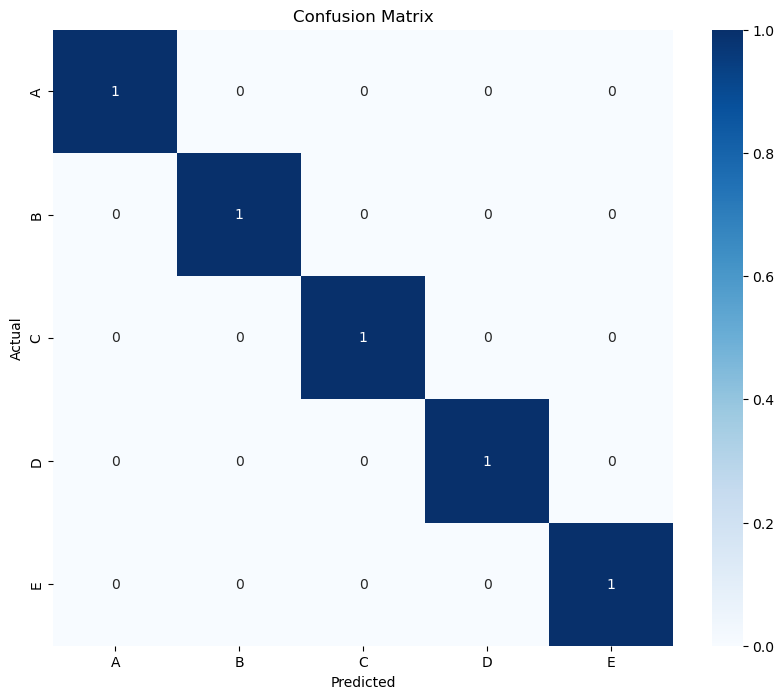

In [12]:
conf_matrix = confusion_matrix(y_test_asl, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(asl_label_map.values()), yticklabels=list(asl_label_map.values()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# After training the model
model.save('asl_alphabet_model.h5')
print("Model saved successfully.")


Model saved successfully.
